# Face Identification (Logistic Regression)

In [1]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_lfw_people
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

# Make this notebook's output stable across runs
random_state = 1000
np.random.seed(random_state)

# Options for plots
%matplotlib inline
sns.set()
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Load Data

### Data Description

The dataset contains images of faces. The dataset includes a name label for each face.

Source: [Labeled Faces in the Wild](http://vis-www.cs.umass.edu/lfw/)

In [2]:
# Load the Labeled Faces in the Wild dataset
lfw = fetch_lfw_people(min_faces_per_person=60)
print(lfw.images.shape)

(1348, 62, 47)


In [3]:
# List the unique names
np.unique(lfw.target_names)

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Junichiro Koizumi',
       'Tony Blair'], dtype='<U17')

In [4]:
# Get counts of each class
np.unique(lfw.target, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([ 77, 236, 121, 530, 109,  71,  60, 144]))

In [5]:
# Shape of each image is 62 x 47, yielding 2,914 pixels
lfw.images[0].shape

(62, 47)

In [6]:
# Print the first two rows of the first image
lfw.images[0][:2, :]

array([[0.53464055, 0.5254902 , 0.49673203, 0.46797386, 0.45228758,
        0.4627451 , 0.4862745 , 0.51633984, 0.5320261 , 0.5555556 ,
        0.5803922 , 0.5895425 , 0.5973856 , 0.6104575 , 0.6379085 ,
        0.64575166, 0.64705884, 0.64575166, 0.6130719 , 0.606536  ,
        0.620915  , 0.627451  , 0.65751636, 0.6470588 , 0.61568624,
        0.6039216 , 0.5895425 , 0.59999996, 0.5908497 , 0.57124186,
        0.5503268 , 0.52287585, 0.5150327 , 0.5019608 , 0.4888889 ,
        0.47843137, 0.4392157 , 0.3934641 , 0.33856213, 0.32156864,
        0.29934642, 0.2784314 , 0.27320263, 0.26928106, 0.2653595 ,
        0.2653595 , 0.26013073],
       [0.56993467, 0.545098  , 0.4797386 , 0.44705883, 0.43398693,
        0.4496732 , 0.4928105 , 0.5398693 , 0.551634  , 0.54640526,
        0.5620915 , 0.57647055, 0.59477127, 0.60915035, 0.6313726 ,
        0.64705884, 0.654902  , 0.66013074, 0.6405229 , 0.61960787,
        0.62352943, 0.63529414, 0.65751636, 0.6405229 , 0.620915  ,
        0.61045

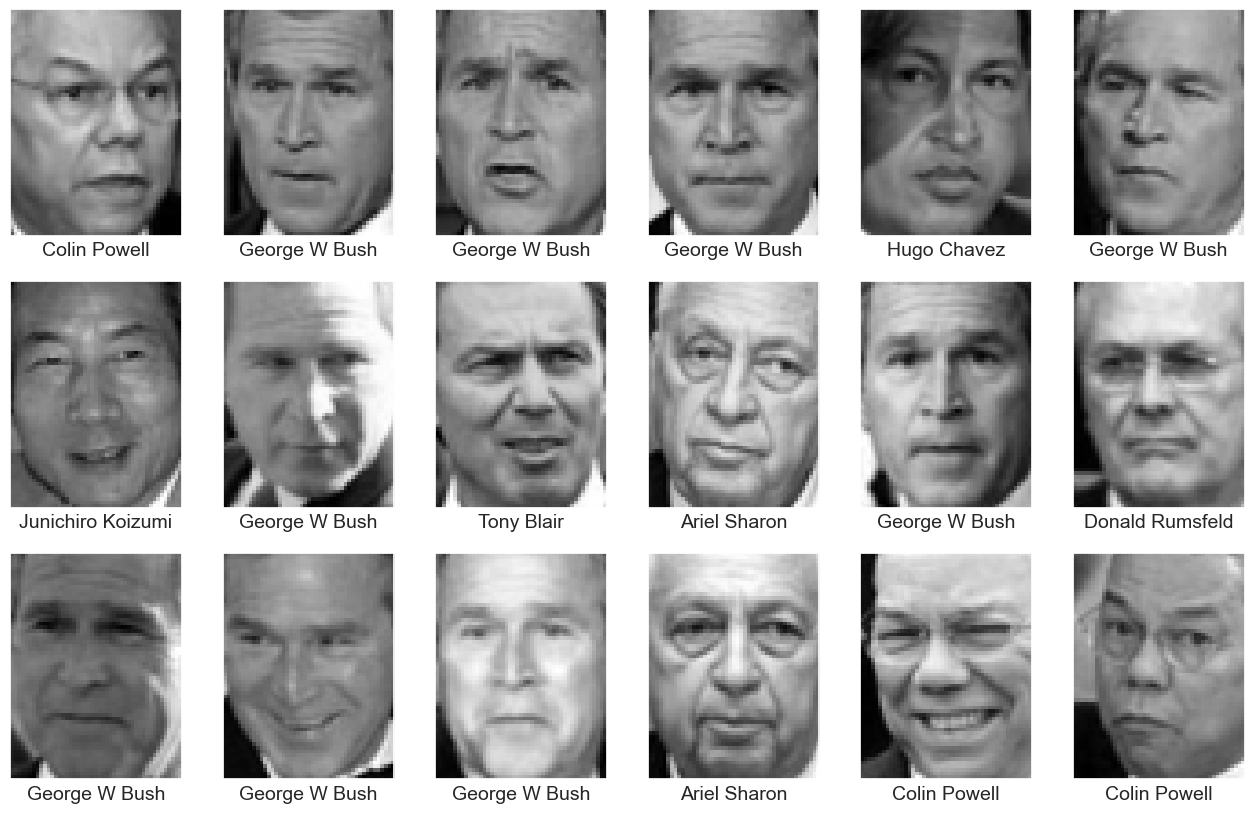

In [7]:
# Display images of first 18 faces
fig, axs = plt.subplots(3, 6, figsize=(16, 10))
for i, ax in enumerate(axs.flat):
    ax.imshow(lfw.images[i], cmap='gray')
    ax.set(xticks=[], yticks=[],
            xlabel=lfw.target_names[lfw.target[i]])

## Fit a Model to All Data

In [8]:
y = lfw.target_names[lfw.target]
X = lfw.data

logreg_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(multi_class='multinomial',
                                  random_state=random_state,
                                  solver='lbfgs', C=2, max_iter=10_000))
])

logreg_pipe.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(C=2, max_iter=10000,
                                    multi_class='multinomial',
                                    random_state=1000))])

In [9]:
# Evaluate the performance of the logistic regression
y_pred = logreg_pipe.predict(X)
print(classification_report(y, y_pred))

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      1.00      1.00        77
     Colin Powell       1.00      1.00      1.00       236
  Donald Rumsfeld       1.00      1.00      1.00       121
    George W Bush       1.00      1.00      1.00       530
Gerhard Schroeder       1.00      1.00      1.00       109
      Hugo Chavez       1.00      1.00      1.00        71
Junichiro Koizumi       1.00      1.00      1.00        60
       Tony Blair       1.00      1.00      1.00       144

         accuracy                           1.00      1348
        macro avg       1.00      1.00      1.00      1348
     weighted avg       1.00      1.00      1.00      1348



## Fit a Model Using a Train-Test Split

In [10]:
# Do train-test split
(X_train, X_test,
 y_train, y_test) = train_test_split(X, y)

In [11]:
# Fit on train data
logreg_pipe.fit(X_train, y_train)
y_pred = logreg_pipe.predict(X_train)
print(classification_report(y_train, y_pred))

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      1.00      1.00        58
     Colin Powell       1.00      1.00      1.00       176
  Donald Rumsfeld       1.00      1.00      1.00        89
    George W Bush       1.00      1.00      1.00       397
Gerhard Schroeder       1.00      1.00      1.00        83
      Hugo Chavez       1.00      1.00      1.00        49
Junichiro Koizumi       1.00      1.00      1.00        48
       Tony Blair       1.00      1.00      1.00       111

         accuracy                           1.00      1011
        macro avg       1.00      1.00      1.00      1011
     weighted avg       1.00      1.00      1.00      1011



In [12]:
# Evaluate on test data
y_pred = logreg_pipe.predict(X_test)
print(classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.89      0.94        19
     Colin Powell       0.88      0.85      0.86        60
  Donald Rumsfeld       0.76      0.78      0.77        32
    George W Bush       0.85      0.93      0.89       133
Gerhard Schroeder       0.81      0.65      0.72        26
      Hugo Chavez       0.84      0.73      0.78        22
Junichiro Koizumi       0.83      0.83      0.83        12
       Tony Blair       0.81      0.76      0.78        33

         accuracy                           0.85       337
        macro avg       0.85      0.80      0.82       337
     weighted avg       0.85      0.85      0.84       337



In [13]:
# Get locations of the model's misses
miss_idx = np.flatnonzero(y_test != y_pred)
miss_idx.shape

(52,)

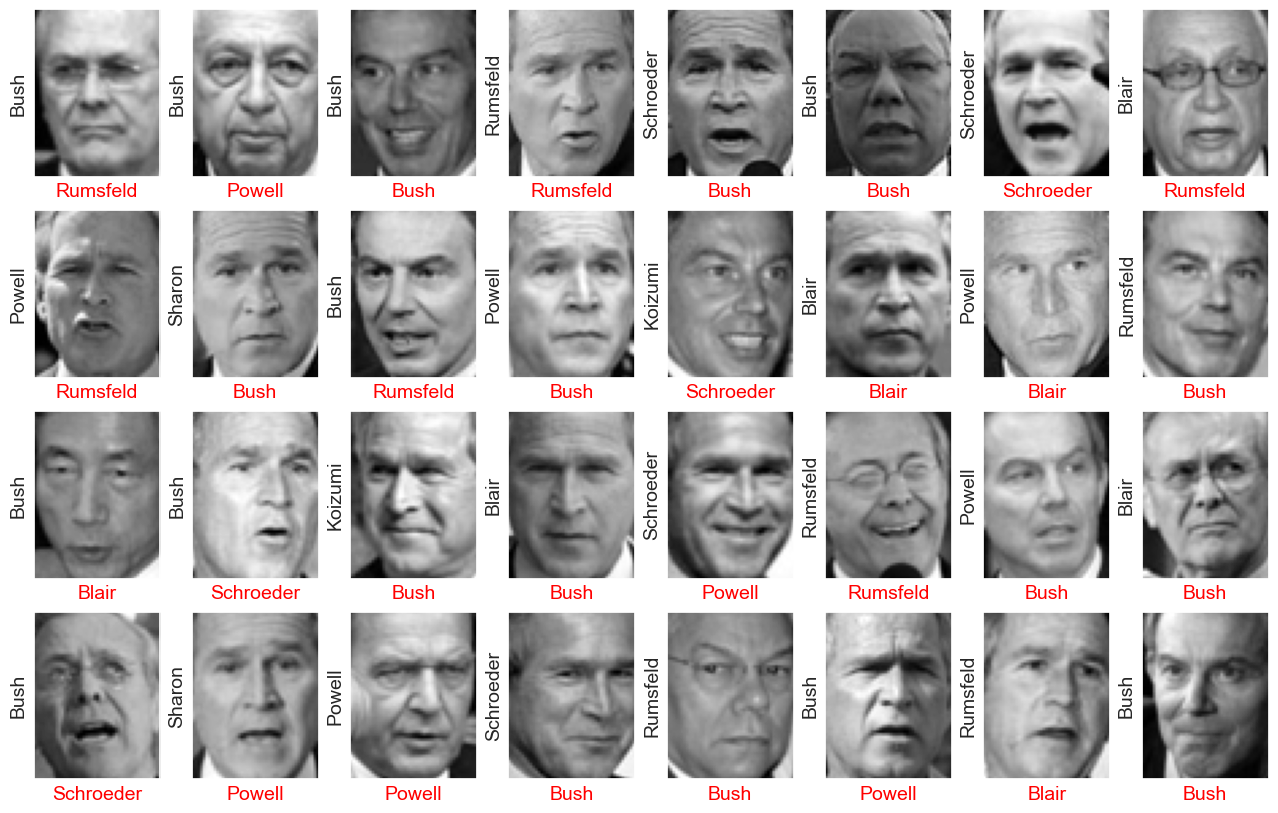

In [14]:
# Visualize the model's misses
miss_image = lfw.images[miss_idx]
miss_pred = y_pred[miss_idx]
miss_actual = y_train[miss_idx]

fig, axs = plt.subplots(4, 8, figsize=(16, 10))
for i, ax in enumerate(axs.flat):
    ax.imshow(miss_image[i], cmap='gray')
    ax.set(xticks=[], yticks=[],
           ylabel=miss_actual[i].split()[-1])
    ax.set_xlabel(miss_pred[i].split()[-1], color='red')

## Exercise

Compare the performance of the model with no regularization (i.e., when the `penalty` argument is None) to the performance with regularization (e.g., setting `penalty` to the default value of 'l2'). Try different approaches to regularization, such as modifying the argument `C`. How much does regularization improve the model's capacity for generalization?

In [15]:
logreg_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(multi_class='multinomial',
                                  penalty=None,
                                  random_state=random_state,
                                  solver='lbfgs',
                                  max_iter=10_000))
])

# Fit on train data
logreg_pipe.fit(X_train, y_train)
y_pred = logreg_pipe.predict(X_train)
print(classification_report(y_train, y_pred))

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      1.00      1.00        58
     Colin Powell       1.00      1.00      1.00       176
  Donald Rumsfeld       1.00      1.00      1.00        89
    George W Bush       1.00      1.00      1.00       397
Gerhard Schroeder       1.00      1.00      1.00        83
      Hugo Chavez       1.00      1.00      1.00        49
Junichiro Koizumi       1.00      1.00      1.00        48
       Tony Blair       1.00      1.00      1.00       111

         accuracy                           1.00      1011
        macro avg       1.00      1.00      1.00      1011
     weighted avg       1.00      1.00      1.00      1011



In [16]:
# Evaluate on test data
y_pred = logreg_pipe.predict(X_test)
print(classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

     Ariel Sharon       0.74      0.74      0.74        19
     Colin Powell       0.84      0.85      0.84        60
  Donald Rumsfeld       0.78      0.78      0.78        32
    George W Bush       0.91      0.87      0.89       133
Gerhard Schroeder       0.68      0.73      0.70        26
      Hugo Chavez       0.77      0.77      0.77        22
Junichiro Koizumi       0.71      0.83      0.77        12
       Tony Blair       0.79      0.82      0.81        33

         accuracy                           0.83       337
        macro avg       0.78      0.80      0.79       337
     weighted avg       0.83      0.83      0.83       337

